<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex05_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%ED%9A%8C%EA%B7%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표 설정
- 인공신경망을 통해 보스턴 주택가격 회귀예측을 진행해보자

In [188]:
# 1. 드라이브 마운트
# 2. 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [189]:
# 3. 데이터 불러오기
boston=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/boston_housing.csv')
boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [190]:
boston.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [191]:
# 쓸모없는 컬럼 제거
boston.drop(['Unnamed: 0'],axis=1,inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [192]:
# 결측치 확인
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [193]:
# 문제와 정답 분리 (정답 : MEDV)
X=boston.iloc[:,:-1]
y=boston['MEDV']
X.shape,y.shape

((506, 13), (506,))

In [194]:
# 훈련 데이터셋과 평가 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=55)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [195]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [196]:
model=Sequential()

In [197]:
# 풀이 1
model1=Sequential() # 1 번 모델 : sigmoid + SGD
model1.add(Dense(units=25,input_dim=13,activation='sigmoid')) # 입력층
model1.add(Dense(units=50,activation='sigmoid')) # 중간층 1
model1.add(Dense(units=25,activation='sigmoid')) # 중간층 1
model1.add(Dense(units=10,activation='sigmoid')) # 중간층 1
model1.add(Dense(units=1)) # 출력층
model1.summary()
model1.compile(loss='mse',optimizer='SGD') # 모델 컴파일
h1=model1.fit(X_train,y_train,epochs=200) # 모델 학습
model1.evaluate(X_test,y_test) # 모델 평가

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 25)                350       
                                                                 
 dense_237 (Dense)           (None, 50)                1300      
                                                                 
 dense_238 (Dense)           (None, 25)                1275      
                                                                 
 dense_239 (Dense)           (None, 10)                260       
                                                                 
 dense_240 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3196 (12.48 KB)
Trainable params: 3196 (12.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
12/12 [

72.8697738647461

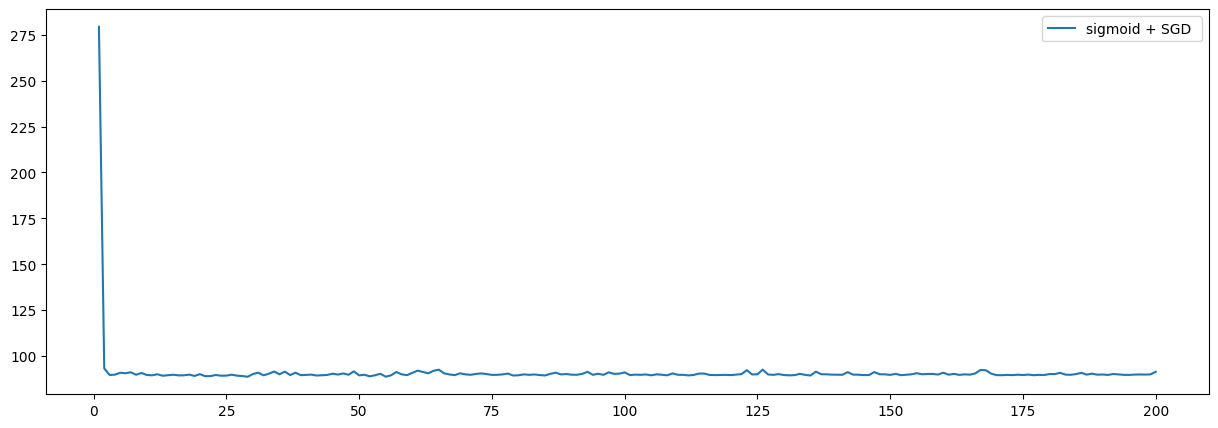

In [198]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h1.history['loss'],label='sigmoid + SGD ')
plt.legend()
plt.show()

In [199]:
# 풀이 2
model2=Sequential() # 1 번 모델 : sigmoid + adam
model2.add(Dense(units=25,input_dim=13,activation='sigmoid')) # 입력층
model2.add(Dense(units=50,activation='sigmoid')) # 중간층 1
model2.add(Dense(units=25,activation='sigmoid')) # 중간층 1
model2.add(Dense(units=10,activation='sigmoid')) # 중간층 1
model2.add(Dense(units=1)) # 출력층
model2.summary()
model2.compile(loss='mse',optimizer='adam') # 모델 컴파일
h2=model2.fit(X_train,y_train,epochs=200) # 모델 학습
model2.evaluate(X_test,y_test) # 모델 평가

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 25)                350       
                                                                 
 dense_242 (Dense)           (None, 50)                1300      
                                                                 
 dense_243 (Dense)           (None, 25)                1275      
                                                                 
 dense_244 (Dense)           (None, 10)                260       
                                                                 
 dense_245 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3196 (12.48 KB)
Trainable params: 3196 (12.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
12/12 [

215.1946563720703

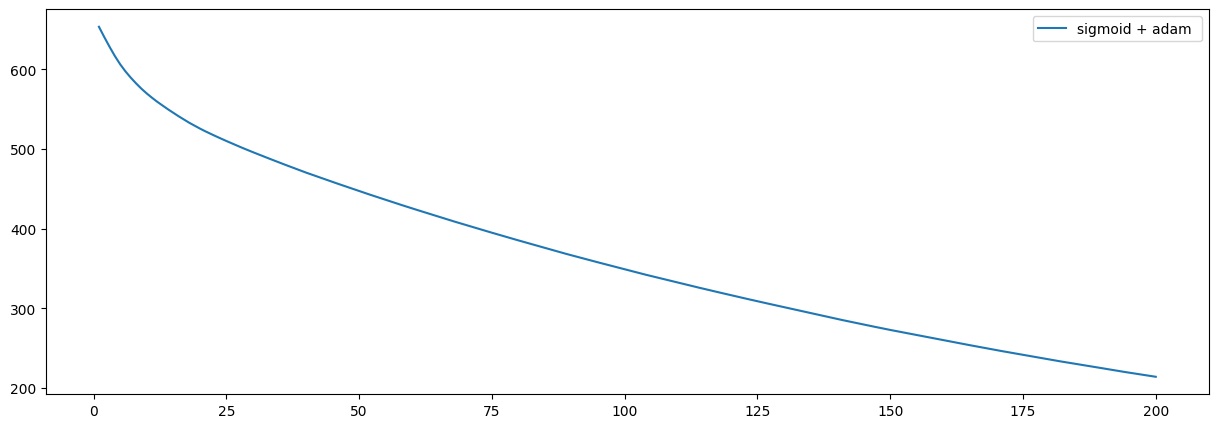

In [200]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h2.history['loss'],label='sigmoid + adam ')
plt.legend()
plt.show()

In [201]:
# 풀이 3
model3=Sequential() # 1 번 모델 : relu + adam
model3.add(Dense(units=25,input_dim=13,activation='relu')) # 입력층
model3.add(Dense(units=50,activation='relu')) # 중간층 1
model3.add(Dense(units=25,activation='relu')) # 중간층 1
model3.add(Dense(units=10,activation='relu')) # 중간층 1
model3.add(Dense(units=1)) # 출력층
model3.summary()
model3.compile(loss='mse',optimizer='adam') # 모델 컴파일
h3=model3.fit(X_train,y_train,epochs=200) # 모델 학습
model3.evaluate(X_test,y_test) # 모델 평가

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_246 (Dense)           (None, 25)                350       
                                                                 
 dense_247 (Dense)           (None, 50)                1300      
                                                                 
 dense_248 (Dense)           (None, 25)                1275      
                                                                 
 dense_249 (Dense)           (None, 10)                260       
                                                                 
 dense_250 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3196 (12.48 KB)
Trainable params: 3196 (12.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
12/12 [

14.828411102294922

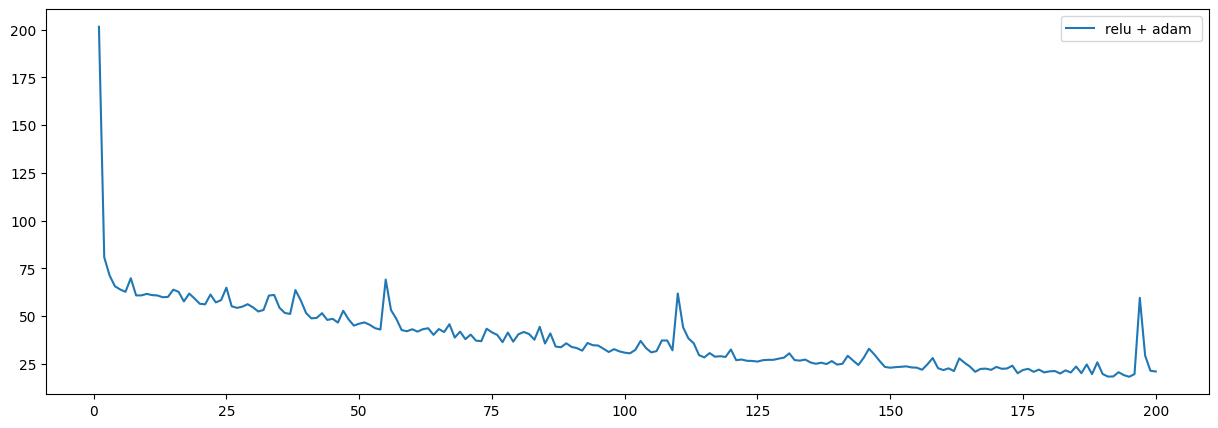

In [202]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h3.history['loss'],label='relu + adam ')
plt.legend()
plt.show()

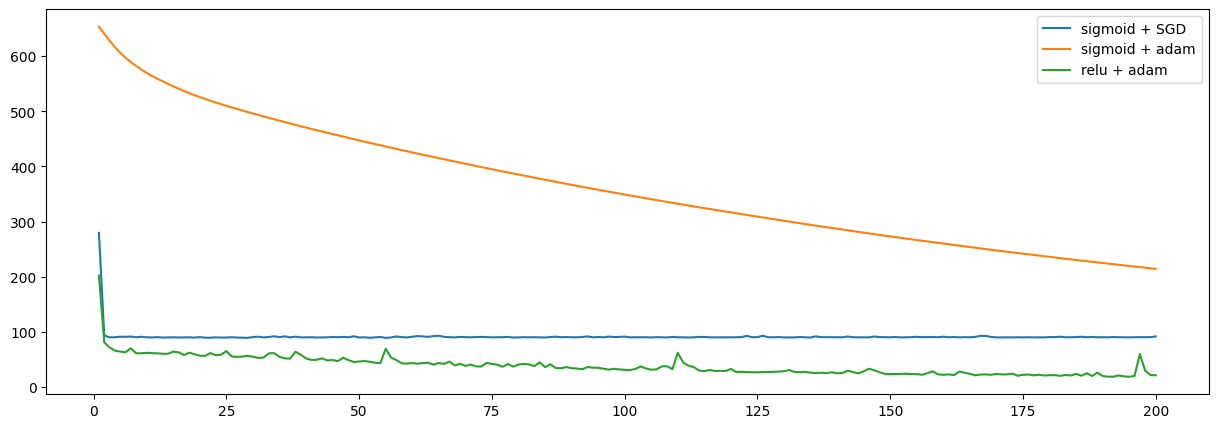

In [203]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),h1.history['loss'],label='sigmoid + SGD')
plt.plot(range(1,201),h2.history['loss'],label='sigmoid + adam')
plt.plot(range(1,201),h3.history['loss'],label='relu + adam')
plt.legend()
plt.show()

In [178]:
model.add(Dense(units=10,input_dim=13,activation='sigmoid'))
model.add(Dense(units=20,activation='sigmoid'))
model.add(Dense(units=10,activation='sigmoid'))
model.add(Dense(units=5,activation='sigmoid'))
model.add(Dense(units=1))
model.summary()
model.compile(loss='mse',optimizer='SGD')
h=model.fit(X_train,y_train,epochs=300)
model.evaluate(X_test,y_test)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                140       
                                                                 
 dense_212 (Dense)           (None, 20)                220       
                                                                 
 dense_213 (Dense)           (None, 10)                210       
                                                                 
 dense_214 (Dense)           (None, 5)                 55        
                                                                 
 dense_215 (Dense)           (None, 1)                 6         
                                                                 
Total params: 631 (2.46 KB)
Trainable params: 631 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
12/12 [====

64.41827392578125

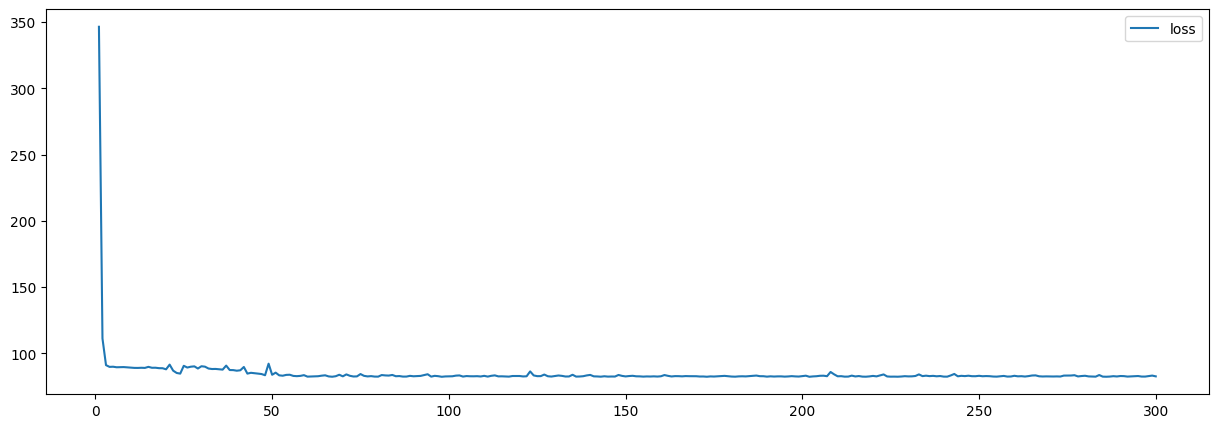

In [179]:
plt.figure(figsize=(15,5))
plt.plot(range(1,301),h.history['loss'],label='loss')
plt.legend()
plt.show()

In [180]:
model.add(Dense(units=10,input_dim=13,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1))
model.summary()
model.compile(loss='mse',optimizer='SGD')
h=model.fit(X_train,y_train,epochs=300)
model.evaluate(X_test,y_test)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                140       
                                                                 
 dense_212 (Dense)           (None, 20)                220       
                                                                 
 dense_213 (Dense)           (None, 10)                210       
                                                                 
 dense_214 (Dense)           (None, 5)                 55        
                                                                 
 dense_215 (Dense)           (None, 1)                 6         
                                                                 
 dense_216 (Dense)           (None, 10)                20        
                                                                 
 dense_217 (Dense)           (None, 20)              

nan

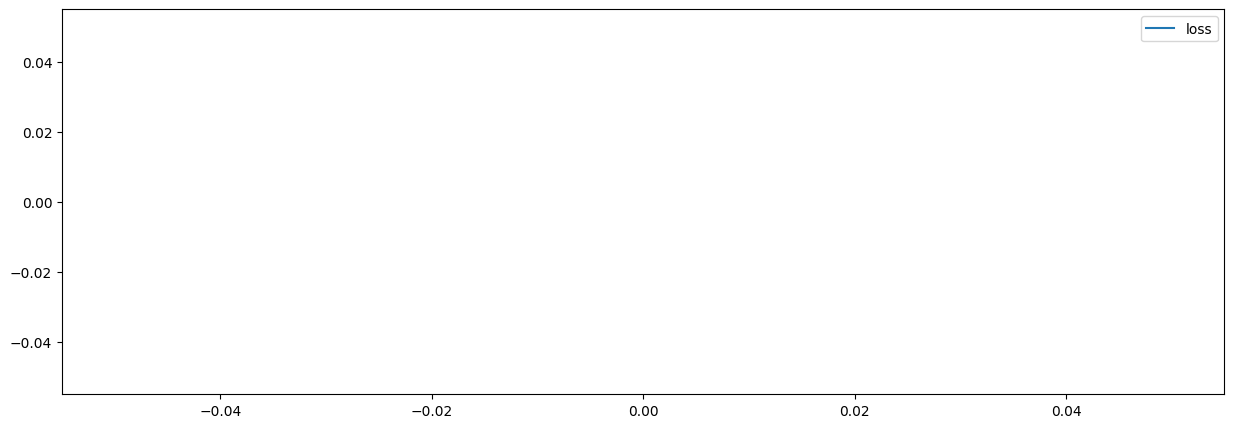

In [181]:
plt.figure(figsize=(15,5))
plt.plot(range(1,301),h.history['loss'],label='loss')
plt.legend()
plt.show()

In [182]:
model.add(Dense(units=10,input_dim=13,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1))
model.summary()
model.compile(loss='mse',optimizer='adam')
h=model.fit(X_train,y_train,epochs=300)
model.evaluate(X_test,y_test)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                140       
                                                                 
 dense_212 (Dense)           (None, 20)                220       
                                                                 
 dense_213 (Dense)           (None, 10)                210       
                                                                 
 dense_214 (Dense)           (None, 5)                 55        
                                                                 
 dense_215 (Dense)           (None, 1)                 6         
                                                                 
 dense_216 (Dense)           (None, 10)                20        
                                                                 
 dense_217 (Dense)           (None, 20)              

nan

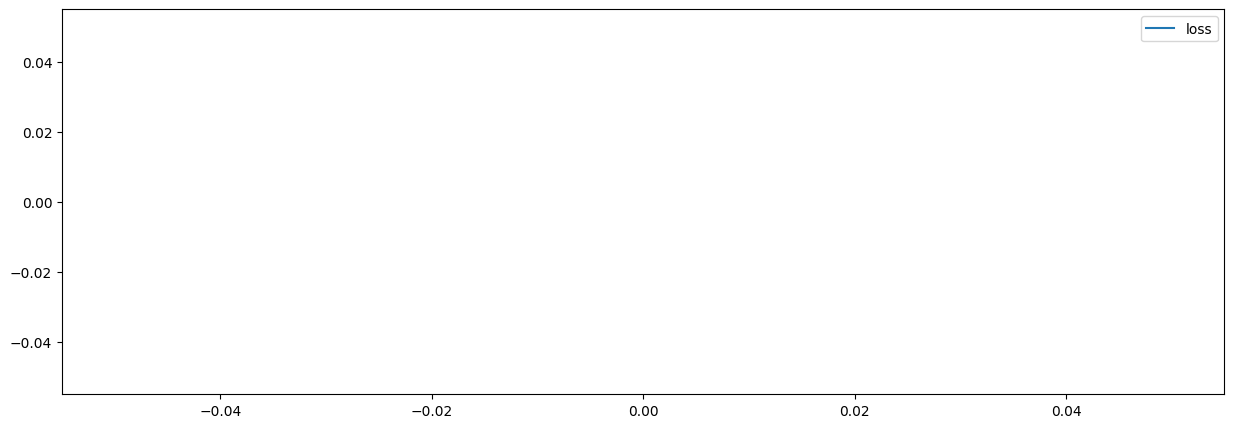

In [183]:
plt.figure(figsize=(15,5))
plt.plot(range(1,301),h.history['loss'],label='loss')
plt.legend()
plt.show()

In [184]:
model.add(Dense(units=10,input_dim=13,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='softmax'))
model.summary()
model.compile(loss='mse',optimizer='adam')
h=model.fit(X_train,y_train,epochs=300)
model.evaluate(X_test,y_test)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                140       
                                                                 
 dense_212 (Dense)           (None, 20)                220       
                                                                 
 dense_213 (Dense)           (None, 10)                210       
                                                                 
 dense_214 (Dense)           (None, 5)                 55        
                                                                 
 dense_215 (Dense)           (None, 1)                 6         
                                                                 
 dense_216 (Dense)           (None, 10)                20        
                                                                 
 dense_217 (Dense)           (None, 20)              

nan

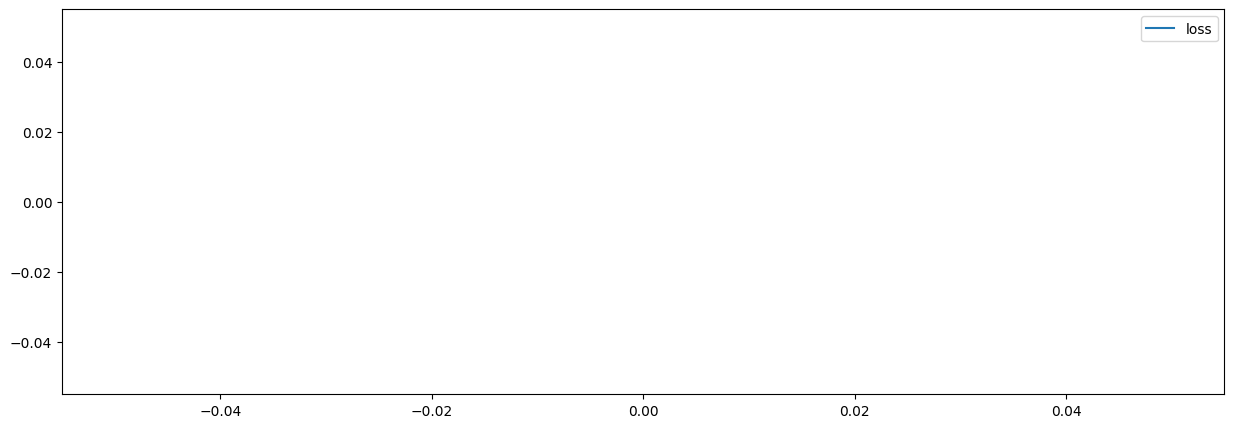

In [185]:
plt.figure(figsize=(15,5))
plt.plot(range(1,301),h.history['loss'],label='loss')
plt.legend()
plt.show()